# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Magic matplotlib command to have plots shown in the notebook
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called `chipo`.

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
#print(open(url).read())
chipo = pd.read_csv(url, sep='\t')

### Step 4. Display the first 10 entries.

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items ordered

In [4]:
# get top 5 ordered items
Top_5_item = chipo.groupby('item_name').agg({'quantity' : 'sum'}).sort_values('quantity', ascending=False)[:5]

Top_5_item

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

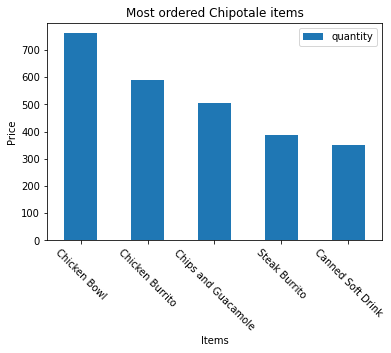

In [5]:
Top_5_item.plot(kind='bar')

plt.title("Most ordered Chipotale items")
plt.xlabel("Items")
plt.ylabel("Price")

# Rotate x-labels
plt.xticks(rotation=-45)

### Step 6. Create a scatter plot with the order price as a function of the number of items ordered
#### Hint: Price should be in the Y-axis and Items ordered in the X-axis

In [28]:
# to remove $ sign from price coloumn

order_price = chipo.item_price.str.slice(1).astype(float)
order_price

chipo['order_price'] = order_price
order_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [30]:
order = chipo.groupby('order_id').sum()
order

,quantity,chipo_order_price,chipo_order_price,chipo_price,order_price
order_id,,,,,
1,4,11.56,11.56,11.56,11.56
2,2,16.98,16.98,16.98,16.98
3,2,12.67,12.67,12.67,12.67
4,2,21.00,21.00,21.00,21.00
5,2,13.70,13.70,13.70,13.70
...,...,...,...,...,...
1830,2,23.00,23.00,23.00,23.00
1831,3,12.90,12.90,12.90,12.90
1832,2,13.20,13.20,13.20,13.20


Text(0, 0.5, 'Order Price ($)')

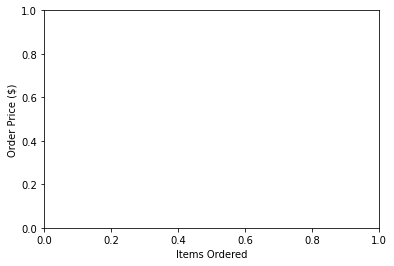

In [31]:
#chipo.plot(x='chipo_order_price', y='quantity', kind='scatter')
#chipo.chipo_price = chipo.chipo_price.str.replace('$', ' ')

order = chipo.groupby('order_id').sum()
order
#sns.scatterplot(x= chipo.order_price, y= chipo.quantity)

#plt.title("Price of order with respect to items ordered")
plt.xlabel("Items Ordered")
plt.ylabel("Order Price ($)")

### BONUS: Create a question and a graph to answer your own question.